<a href="https://colab.research.google.com/github/Rapheal-Jones/deep_learning/blob/master/titled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def load_datasets(flatten=False):
  (X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

  X_train=X_train.astype(float)/255.
  X_test=X_test.astype(float)/255.

  X_train,X_val=X_train[:-10000],X_train[-10000:]
  Y_train,Y_val=Y_train[:-10000],Y_train[-10000:]

  if flatten:
    X_train=X_train.reshape([X_train.shape[0],-1])
    X_test=X_test.reshape([X_test.shape[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
  
  return X_train,Y_train,X_val,Y_val,X_test,Y_test

X_train,Y_train,X_val,Y_val,X_test,Y_test=load_datasets()

In [0]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [0]:
lb=LabelBinarizer()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.transform(Y_test)

In [45]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score,accuracy_score
s=tf.InteractiveSession() 

/tensorflow-1.15.0/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
num_classes=Y_train.shape[1]
num_features=X_train.shape[1]
num_output=Y_train.shape[1]
num_layers_0=512
num_layers_1=256
starter_learning_rate=0.001
regularizer_rate=0.1

In [0]:
input_X=tf.placeholder('float32',shape=(None,num_features),name='input_X')
input_Y=tf.placeholder('float32',shape=(None,num_classes),name='input_Y')

keep_prob=tf.placeholder(tf.float32)

In [0]:
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

In [0]:
hidden_layer_0=tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_layer_0_0=tf.nn.dropout(hidden_layer_0,keep_prob)

hidden_layer_1=tf.nn.relu(tf.matmul(hidden_layer_0_0,weights_1)+bias_1)
hidden_layer_1_1=tf.nn.dropout(hidden_layer_1,keep_prob)

predicted_Y=tf.sigmoid(tf.matmul(hidden_layer_1_1,weights_2)+bias_2)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

In [0]:
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,bias_0,bias_1,bias_2])


In [0]:
correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []

In [54]:
s.run(tf.global_variables_initializer())

for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],input_Y: Y_train[arr[index:index+batch_size]],keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train,input_Y: Y_train,keep_prob:1}))
    
    training_loss.append(s.run(loss, {input_X: X_train,input_Y: Y_train,keep_prob:1}))
    
    testing_accuracy.append(accuracy_score(Y_test.argmax(1),s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))

    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,training_loss[epoch],training_accuracy[epoch],testing_accuracy[epoch]))


Epoch:0, Train loss: 42.37 Train acc: 0.937, Test acc:0.935
Epoch:1, Train loss: 23.45 Train acc: 0.953, Test acc:0.950
Epoch:2, Train loss: 13.11 Train acc: 0.966, Test acc:0.962
Epoch:3, Train loss: 7.50 Train acc: 0.972, Test acc:0.968
Epoch:4, Train loss: 4.50 Train acc: 0.976, Test acc:0.968
Epoch:5, Train loss: 2.93 Train acc: 0.980, Test acc:0.972
Epoch:6, Train loss: 2.14 Train acc: 0.983, Test acc:0.975
Epoch:7, Train loss: 1.77 Train acc: 0.983, Test acc:0.974
Epoch:8, Train loss: 1.59 Train acc: 0.986, Test acc:0.976
Epoch:9, Train loss: 1.52 Train acc: 0.987, Test acc:0.978
Epoch:10, Train loss: 1.49 Train acc: 0.988, Test acc:0.978
Epoch:11, Train loss: 1.47 Train acc: 0.988, Test acc:0.977
Epoch:12, Train loss: 1.47 Train acc: 0.990, Test acc:0.979
Epoch:13, Train loss: 1.47 Train acc: 0.991, Test acc:0.979


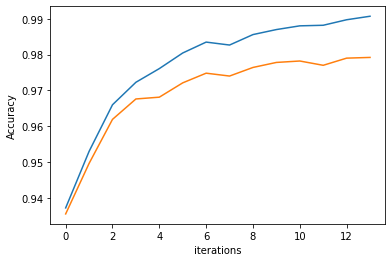

In [55]:
iterations = list(range(epochs))

plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')

plt.ylabel('Accuracy')
plt.xlabel('iterations')

plt.show()


In [56]:

print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))

print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

Train Accuracy: 0.99
Test Accuracy:0.98
